## 探索 T-SNE

### 2D 
- CIFAR-10
- CIFAR-100
- FashionMNIST

Loading CIFAR-10 dataset...
CIFAR-10 dataset loaded.
Loading CIFAR-100 dataset...
CIFAR-100 dataset loaded.
Loading FashionMNIST dataset...
FashionMNIST dataset loaded.


/tmp/ipykernel_104962/1491427730.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return data.astype(np.int)


Sampling 10.0% of the dataset...
Sampling 10.0% of the dataset...
Sampling 10.0% of the dataset...
Performing T-SNE on CIFAR-10 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


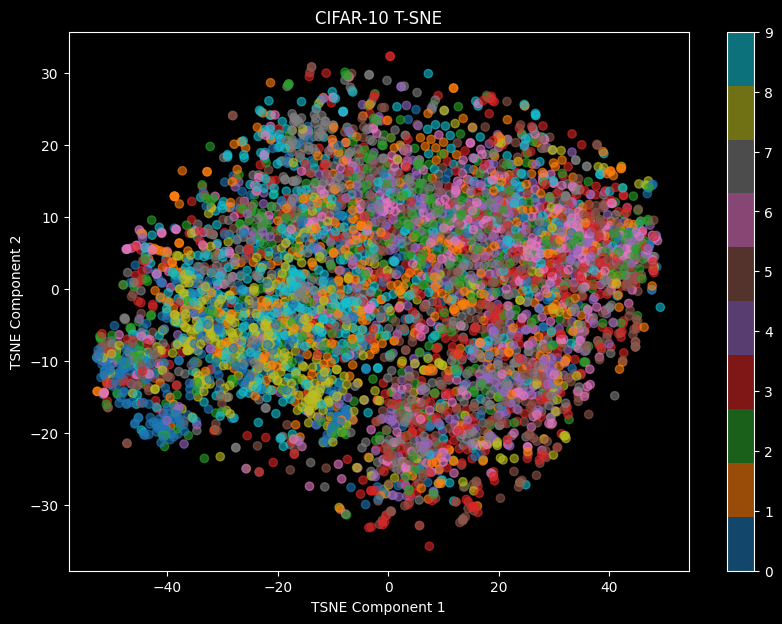

T-SNE plot for CIFAR-10 T-SNE dataset generated.
Performing T-SNE on CIFAR-100 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


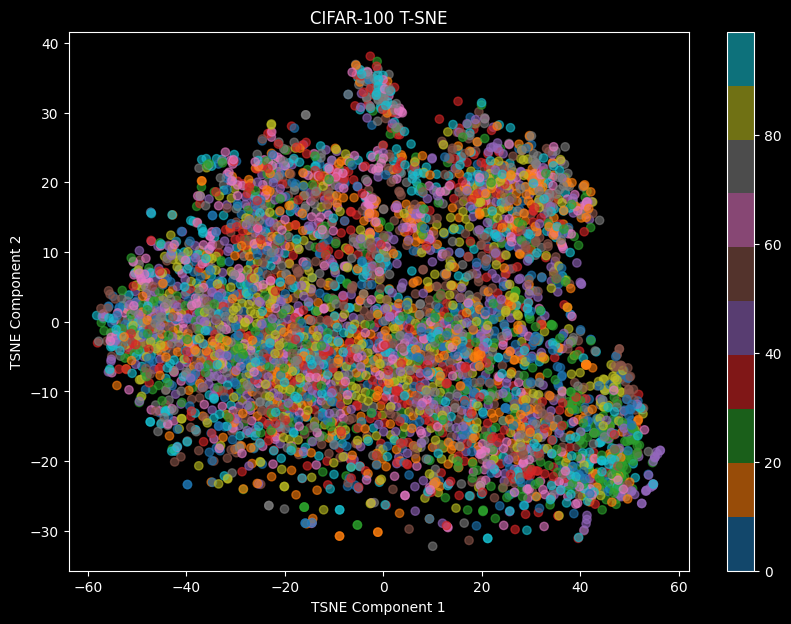

T-SNE plot for CIFAR-100 T-SNE dataset generated.
Performing T-SNE on FashionMNIST T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


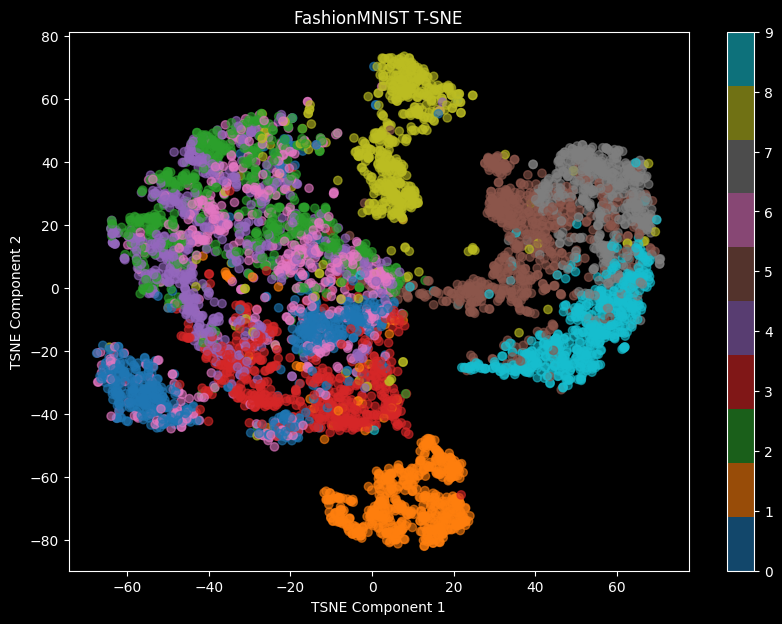

T-SNE plot for FashionMNIST T-SNE dataset generated.


In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import torch
import torchvision
from torchvision import datasets, transforms

# 数据集路径
data_dir = '../data/'

# 读取CIFAR-10数据集
def load_cifar10(path):
    print("Loading CIFAR-10 dataset...")
    with open(os.path.join(path, 'batches.meta'), 'rb') as f:
        meta = pickle.load(f, encoding='bytes')
    label_names = meta[b'label_names']

    data, labels = [], []
    for i in range(1, 6):
        with open(os.path.join(path, f'data_batch_{i}'), 'rb') as f:
            batch = pickle.load(f, encoding='bytes')
            data.append(batch[b'data'])
            labels.extend(batch[b'labels'])

    data = np.vstack(data).astype(np.float32)
    labels = np.array(labels)
    print("CIFAR-10 dataset loaded.")
    return data, labels, label_names

cifar10_path = os.path.join(data_dir, 'cifar-10-batches-py')
cifar10_data, cifar10_labels, cifar10_label_names = load_cifar10(cifar10_path)

# 读取CIFAR-100数据集
def load_cifar100(path):
    print("Loading CIFAR-100 dataset...")
    with open(os.path.join(path, 'train'), 'rb') as f:
        train = pickle.load(f, encoding='bytes')
    with open(os.path.join(path, 'meta'), 'rb') as f:
        meta = pickle.load(f, encoding='bytes')

    data = train[b'data'].astype(np.float32)
    labels = np.array(train[b'fine_labels'])
    label_names = meta[b'fine_label_names']
    print("CIFAR-100 dataset loaded.")
    return data, labels, label_names

cifar100_path = os.path.join(data_dir, 'cifar-100-python')
cifar100_data, cifar100_labels, cifar100_label_names = load_cifar100(cifar100_path)

# 读取FashionMNIST数据集
def load_fashion_mnist(path):
    print("Loading FashionMNIST dataset...")
    def load_images(file_path):
        with open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        return data.reshape(-1, 28*28).astype(np.float32)

    def load_labels(file_path):
        with open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data.astype(np.int)

    train_images = load_images(os.path.join(path, 'raw', 'train-images-idx3-ubyte'))
    train_labels = load_labels(os.path.join(path, 'raw', 'train-labels-idx1-ubyte'))
    print("FashionMNIST dataset loaded.")
    return train_images, train_labels

fashionmnist_path = os.path.join(data_dir, 'FashionMNIST')
fashionmnist_data, fashionmnist_labels = load_fashion_mnist(fashionmnist_path)

# 数据归一化
scaler = StandardScaler()
cifar10_data = scaler.fit_transform(cifar10_data)
cifar100_data = scaler.fit_transform(cifar100_data)
fashionmnist_data = scaler.fit_transform(fashionmnist_data)

# 抽样数据
def sample_data(data, labels, sample_size=0.1):
    print(f"Sampling {sample_size*100}% of the dataset...")
    np.random.seed(42)
    indices = np.random.choice(len(data), int(len(data) * sample_size), replace=False)
    return data[indices], labels[indices]

cifar10_data_sampled, cifar10_labels_sampled = sample_data(cifar10_data, cifar10_labels)
cifar100_data_sampled, cifar100_labels_sampled = sample_data(cifar100_data, cifar100_labels)
fashionmnist_data_sampled, fashionmnist_labels_sampled = sample_data(fashionmnist_data, fashionmnist_labels)

# T-SNE 可视化函数
def plot_tsne(data, labels, title):
    print(f"Performing T-SNE on {title} dataset...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    transformed_data = tsne.fit_transform(data)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.show()
    print(f"T-SNE plot for {title} dataset generated.")

# 画图
plot_tsne(cifar10_data_sampled, cifar10_labels_sampled, 'CIFAR-10 T-SNE')
plot_tsne(cifar100_data_sampled, cifar100_labels_sampled, 'CIFAR-100 T-SNE')
plot_tsne(fashionmnist_data_sampled, fashionmnist_labels_sampled, 'FashionMNIST T-SNE')
# plot_tsne(tinyimagenet_data_sampled, tinyimagenet_labels_sampled, 'TinyImageNet T-SNE')


### 2D

TinyImageNet

Loading TinyImageNet dataset...
TinyImageNet dataset loaded.
Sampling 10.0% of the dataset...
Performing T-SNE on TinyImageNet T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


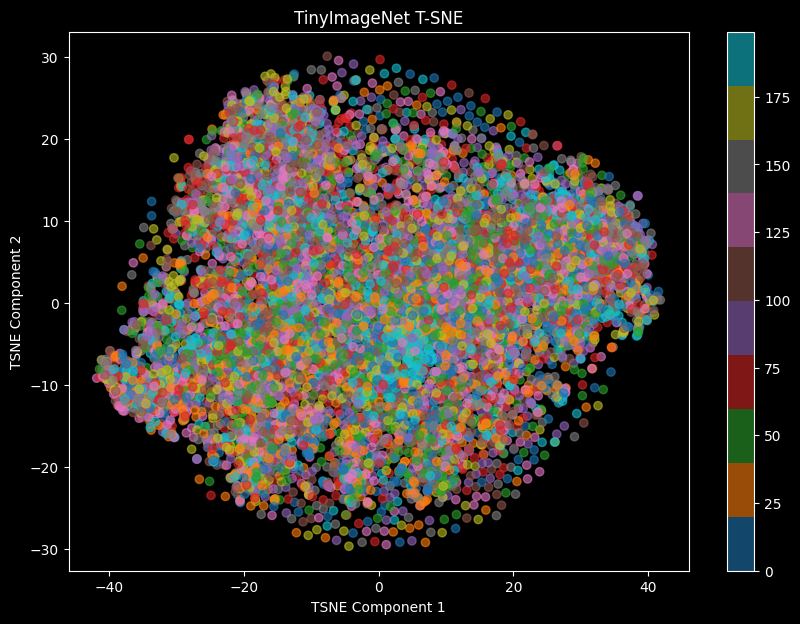

T-SNE plot for TinyImageNet T-SNE dataset generated.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import torch
from torchvision import datasets, transforms

# 数据集路径
data_dir = '../data/'

# 读取TinyImageNet数据集
print("Loading TinyImageNet dataset...")
tinyimagenet_path = os.path.join(data_dir, 'tiny-imagenet-200')
tinyimagenet_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
tinyimagenet_dataset = datasets.ImageFolder(root=os.path.join(tinyimagenet_path, 'train'), transform=tinyimagenet_transform)

tinyimagenet_loader = torch.utils.data.DataLoader(tinyimagenet_dataset, batch_size=len(tinyimagenet_dataset))
tinyimagenet_data, tinyimagenet_labels = next(iter(tinyimagenet_loader))
tinyimagenet_data = tinyimagenet_data.view(len(tinyimagenet_dataset), -1).numpy()
tinyimagenet_labels = np.array([label for _, label in tinyimagenet_dataset.imgs])
print("TinyImageNet dataset loaded.")

# 数据归一化
scaler = StandardScaler()
tinyimagenet_data = scaler.fit_transform(tinyimagenet_data)

# 抽样数据
def sample_data(data, labels, sample_size=0.1):
    print(f"Sampling {sample_size*100}% of the dataset...")
    np.random.seed(42)
    indices = np.random.choice(len(data), int(len(data) * sample_size), replace=False)
    return data[indices], labels[indices]

tinyimagenet_data_sampled, tinyimagenet_labels_sampled = sample_data(tinyimagenet_data, tinyimagenet_labels)

# T-SNE 可视化函数
def plot_tsne(data, labels, title):
    print(f"Performing T-SNE on {title} dataset...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    transformed_data = tsne.fit_transform(data)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.show()
    print(f"T-SNE plot for {title} dataset generated.")

# 画图
plot_tsne(tinyimagenet_data_sampled, tinyimagenet_labels_sampled, 'TinyImageNet T-SNE')


### 3D

- CIFAR-10
- CIFAR-100
- FashionMNIST

Loading FashionMNIST dataset...
FashionMNIST dataset loaded.


/tmp/ipykernel_210198/3997563950.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return labels.astype(np.int)


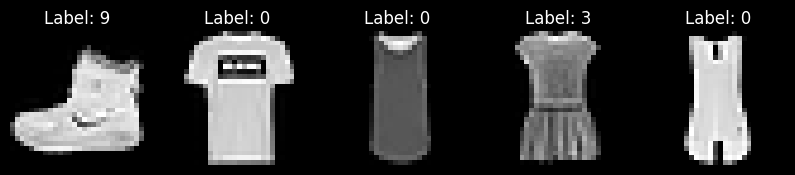

Sampling 10.0% of the dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Performing DensMAP on FashionMNIST DensMAP 2D dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


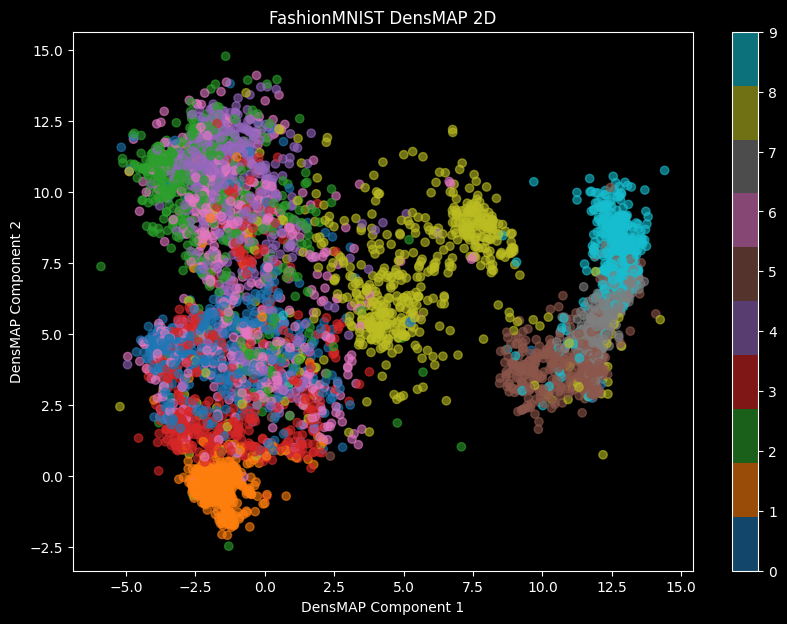

DensMAP plot for FashionMNIST DensMAP 2D dataset generated.
Performing DensMAP on FashionMNIST DensMAP 3D dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


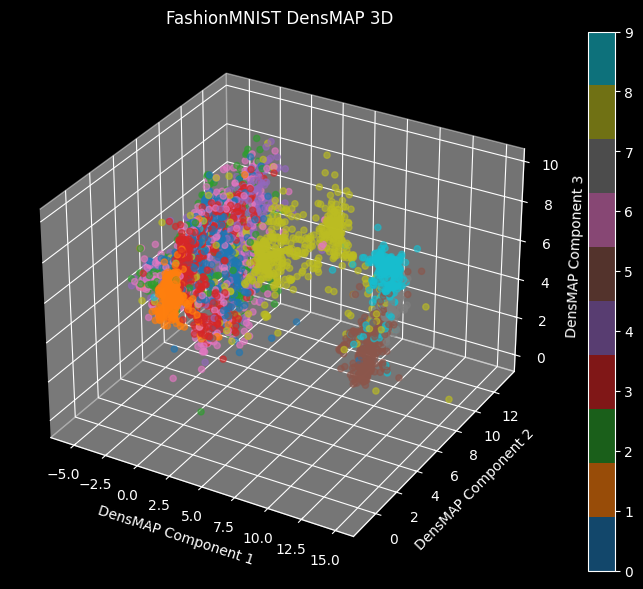

DensMAP plot for FashionMNIST DensMAP 3D dataset generated.


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap  # 确保正确导入UMAP
import torch
import torchvision
from torchvision import datasets, transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader
from mpl_toolkits.mplot3d import Axes3D  # 3D绘图
import struct

# 数据集路径
data_dir = '../data/'

# 读取FashionMNIST数据集
def load_fashion_mnist(path):
    print("Loading FashionMNIST dataset...")

    def load_images(file_path):
        with open(file_path, 'rb') as f:
            data = f.read()
        _, num_images, rows, cols = struct.unpack('>IIII', data[:16])
        images = np.frombuffer(data, dtype=np.uint8, offset=16)
        return images.reshape(num_images, 1, rows, cols).astype(np.float32)

    def load_labels(file_path):
        with open(file_path, 'rb') as f:
            data = f.read()
        _, num_labels = struct.unpack('>II', data[:8])
        labels = np.frombuffer(data, dtype=np.uint8, offset=8)
        return labels.astype(np.int)

    train_images = load_images(os.path.join(path, 'raw', 'train-images-idx3-ubyte'))
    train_labels = load_labels(os.path.join(path, 'raw', 'train-labels-idx1-ubyte'))
    train_images = np.repeat(train_images, 3, axis=1)  # 将单通道复制为三通道
    print("FashionMNIST dataset loaded.")
    return train_images, train_labels

fashionmnist_path = os.path.join(data_dir, 'FashionMNIST')
fashionmnist_data, fashionmnist_labels = load_fashion_mnist(fashionmnist_path)

# 打印一些样本图像以验证读取过程
def show_sample_images(data, labels, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(data[i][0], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

show_sample_images(fashionmnist_data, fashionmnist_labels)

# 数据归一化
fashionmnist_data = fashionmnist_data / 255.0

# 抽样数据
def sample_data(data, labels, sample_size=0.1):
    print(f"Sampling {sample_size*100}% of the dataset...")
    np.random.seed(42)
    indices = np.random.choice(len(data), int(len(data) * sample_size), replace=False)
    return data[indices], labels[indices]

fashionmnist_data_sampled, fashionmnist_labels_sampled = sample_data(fashionmnist_data, fashionmnist_labels)

# 使用预训练模型提取特征
def extract_features(data, model):
    model.eval()
    features = []
    with torch.no_grad():
        for x in data:
            x = torch.tensor(x).unsqueeze(0).cuda()
            feature = model(x).cpu().numpy().flatten()
            features.append(feature)
    return np.array(features)

# 加载预训练的ResNet18模型
model = resnet18(pretrained=True).cuda()
model.fc = torch.nn.Identity()  # 移除最后的分类层

# 提取特征
fashionmnist_features = extract_features(fashionmnist_data_sampled, model)

# 2D DensMAP 可视化函数
def plot_densmap_2d(data, labels, title):
    print(f"Performing DensMAP on {title} dataset...")
    reducer = umap.UMAP(densmap=True, n_components=2, random_state=42)
    transformed_data = reducer.fit_transform(data)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("DensMAP Component 1")
    plt.ylabel("DensMAP Component 2")
    plt.show()
    print(f"DensMAP plot for {title} dataset generated.")

# 3D DensMAP 可视化函数
def plot_densmap_3d(data, labels, title):
    print(f"Performing DensMAP on {title} dataset...")
    reducer = umap.UMAP(densmap=True, n_components=3, random_state=42)
    transformed_data = reducer.fit_transform(data)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=labels, cmap='tab10', alpha=0.6)
    fig.colorbar(scatter)
    ax.set_title(title)
    ax.set_xlabel("DensMAP Component 1")
    ax.set_ylabel("DensMAP Component 2")
    ax.set_zlabel("DensMAP Component 3")
    plt.show()
    print(f"DensMAP plot for {title} dataset generated.")

# 画图
plot_densmap_2d(fashionmnist_features, fashionmnist_labels_sampled, 'FashionMNIST DensMAP 2D')
plot_densmap_3d(fashionmnist_features, fashionmnist_labels_sampled, 'FashionMNIST DensMAP 3D')


In [ ]:
import sklearn.datasets
import umap
import umap.plot

fmnist = sklearn.datasets.fetch_openml("Fashion-MNIST")

In [12]:
mapper = umap.UMAP(random_state=42).fit(fmnist.data)

/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: >

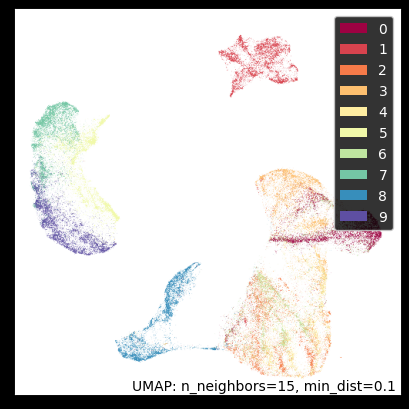

In [13]:
umap.plot.points(mapper, labels=fmnist.target, width=500, height=500)

/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: >

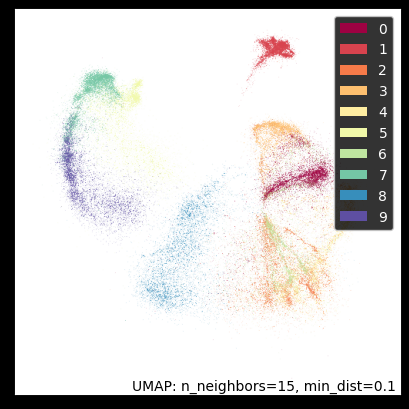

In [14]:
dens_mapper = umap.UMAP(densmap=True, random_state=42).fit(fmnist.data)
umap.plot.points(dens_mapper, labels=fmnist.target, width=500, height=500)


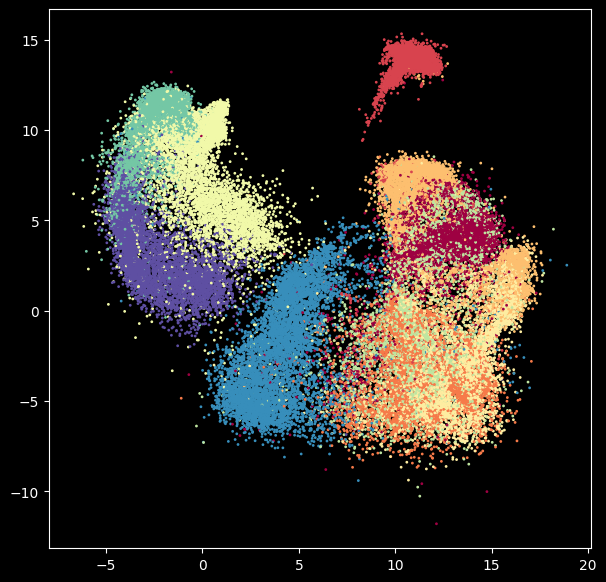

In [15]:
fig, ax = umap.plot.plt.subplots(figsize=(7,7))
ax.scatter(*dens_mapper.embedding_.T, c=fmnist.target.astype('int8'), cmap="Spectral", s=1)

/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: >

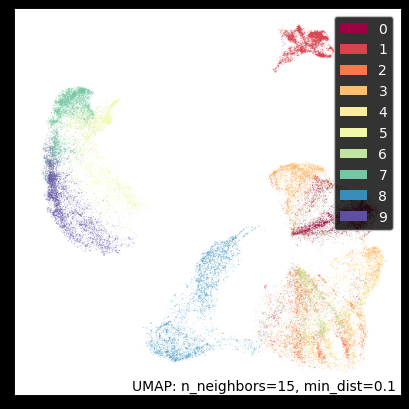

In [16]:
dens_mapper = umap.UMAP(densmap=True, dens_lambda=0.1, random_state=42).fit(fmnist.data)
umap.plot.points(dens_mapper, labels=fmnist.target, width=500, height=500)

## 遗忘效果模拟

Loading FashionMNIST dataset...
FashionMNIST dataset loaded.


/tmp/ipykernel_104962/4081611140.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return data.astype(np.int)


Sampling 10.0% of the dataset...
Simulating forgetting on 20.0% of the data...
Number of labels changed: 1200
Performing T-SNE on FashionMNIST Original T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


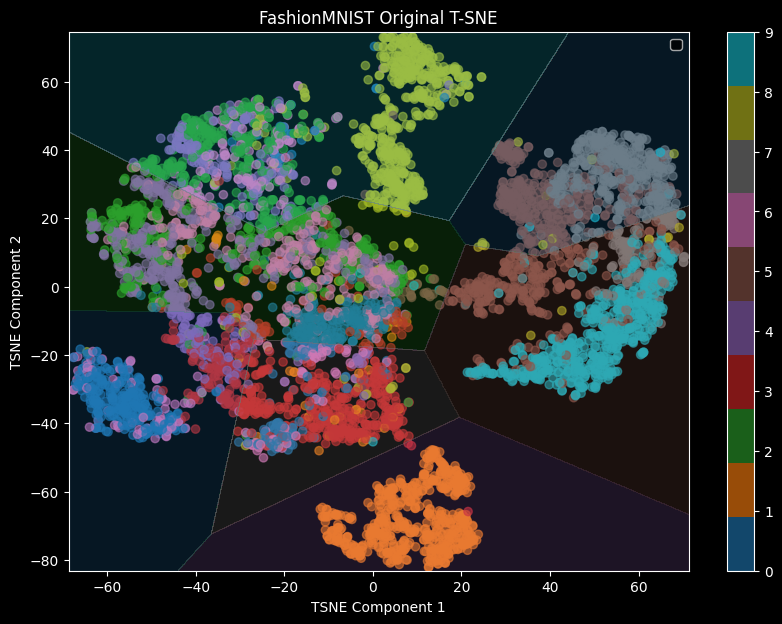

T-SNE plot for FashionMNIST Original T-SNE dataset generated.
Performing T-SNE on FashionMNIST Forgotten T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


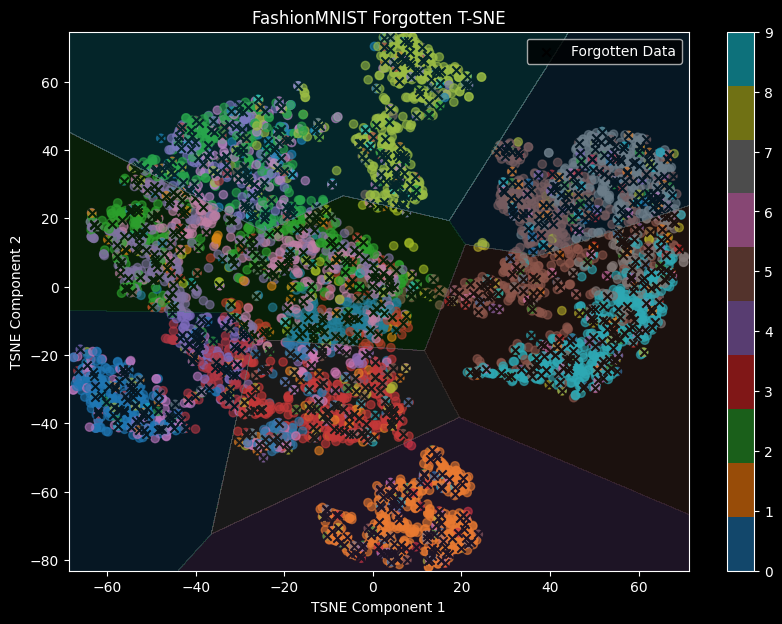

T-SNE plot for FashionMNIST Forgotten T-SNE dataset generated.


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import cm
import random

# 读取FashionMNIST数据集
def load_fashion_mnist(path):
    print("Loading FashionMNIST dataset...")
    def load_images(file_path):
        with open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        return data.reshape(-1, 28*28).astype(np.float32)

    def load_labels(file_path):
        with open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data.astype(np.int)

    train_images = load_images(os.path.join(path, 'raw', 'train-images-idx3-ubyte'))
    train_labels = load_labels(os.path.join(path, 'raw', 'train-labels-idx1-ubyte'))
    print("FashionMNIST dataset loaded.")
    return train_images, train_labels

data_dir = '../data/FashionMNIST'
fashionmnist_data, fashionmnist_labels = load_fashion_mnist(data_dir)

# 数据归一化
scaler = StandardScaler()
fashionmnist_data = scaler.fit_transform(fashionmnist_data).astype(np.float64)

# 抽样数据
def sample_data(data, labels, sample_size=0.1):
    print(f"Sampling {sample_size*100}% of the dataset...")
    np.random.seed(42)
    indices = np.random.choice(len(data), int(len(data) * sample_size), replace=False)
    return data[indices], labels[indices]

fashionmnist_data_sampled, fashionmnist_labels_sampled = sample_data(fashionmnist_data, fashionmnist_labels)

# 模拟遗忘学习效果
def simulate_forgetting(data, labels, forget_ratio=0.2):
    print(f"Simulating forgetting on {forget_ratio*100}% of the data...")
    unique_labels = np.unique(labels)
    num_classes = len(unique_labels)
    num_to_forget = int(len(labels) * forget_ratio)
    
    # 随机选择要遗忘的数据点
    indices_to_forget = random.sample(range(len(labels)), num_to_forget)
    
    # 将这些数据点的标签随机打散到其他类别
    for idx in indices_to_forget:
        original_label = labels[idx]
        new_label = random.choice([label for label in unique_labels if label != original_label])
        labels[idx] = new_label
    
    return data, labels, indices_to_forget

fashionmnist_data_forgotten, fashionmnist_labels_forgotten, forgotten_indices = simulate_forgetting(fashionmnist_data_sampled.copy(), fashionmnist_labels_sampled.copy())

# 验证标签变化
def check_label_changes(original_labels, modified_labels):
    changes = np.sum(original_labels != modified_labels)
    print(f"Number of labels changed: {changes}")

check_label_changes(fashionmnist_labels_sampled, fashionmnist_labels_forgotten)

# T-SNE 可视化函数
def plot_tsne_with_clusters(data, labels, title, forgotten_indices=None, n_clusters=10):
    print(f"Performing T-SNE on {title} dataset...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    transformed_data = tsne.fit_transform(data).astype(np.float64)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(transformed_data)
    cluster_labels = kmeans.predict(transformed_data)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    
    if forgotten_indices is not None:
        plt.scatter(transformed_data[forgotten_indices, 0], transformed_data[forgotten_indices, 1], c='black', marker='x', label='Forgotten Data')
    
    # 绘制聚类边界
    x_min, x_max = transformed_data[:, 0].min() - 1, transformed_data[:, 0].max() + 1
    y_min, y_max = transformed_data[:, 1].min() - 1, transformed_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()].astype(np.float64))  # 转换为float64类型
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=cm.tab10)
    
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.legend()
    plt.show()
    print(f"T-SNE plot for {title} dataset generated.")

# 画图
plot_tsne_with_clusters(fashionmnist_data_sampled, fashionmnist_labels_sampled, 'FashionMNIST Original T-SNE')
plot_tsne_with_clusters(fashionmnist_data_forgotten, fashionmnist_labels_forgotten, 'FashionMNIST Forgotten T-SNE', forgotten_indices)


## 真实遗忘验证

基于 FashionMNIST 数据集训练的遗忘模型，具体包括：

├── resnet18_fmnist
│   ├── FF
│   │   ├── fishercheckpoint.pth.tar
│   │   └── fishereval_result.pth.tar
│   ├── finetune_backbone
│   │   ├── retraincheckpoint.pth.tar
│   │   └── retraineval_result.pth.tar
│   ├── FT
│   │   ├── FTcheckpoint.pth.tar
│   │   └── FTeval_result.pth.tar
│   ├── FT_prune
│   │   ├── FT_prunecheckpoint.pth.tar
│   │   └── FT_pruneeval_result.pth.tar
│   ├── GA
│   │   ├── GAcheckpoint.pth.tar
│   │   └── GAeval_result.pth.tar
│   ├── IU
│   │   ├── wfishercheckpoint.pth.tar
│   │   └── wfishereval_result.pth.tar
│   └── retrain
│       ├── retraincheckpoint.pth.tar
│       └── retraineval_result.pth.tar


├── vgg16_fmnist
│   ├── FF
│   │   ├── fishercheckpoint.pth.tar
│   │   └── fishereval_result.pth.tar
│   ├── finetune_backbone
│   │   ├── retraincheckpoint.pth.tar
│   │   └── retraineval_result.pth.tar
│   ├── FT
│   │   ├── FTcheckpoint.pth.tar
│   │   └── FTeval_result.pth.tar
│   ├── FT_prune
│   │   ├── FT_prunecheckpoint.pth.tar
│   │   └── FT_pruneeval_result.pth.tar
│   ├── GA
│   │   ├── GAcheckpoint.pth.tar
│   │   └── GAeval_result.pth.tar
│   ├── IU
│   │   ├── wfishercheckpoint.pth.tar
│   │   └── wfishereval_result.pth.tar
│   └── retrain
│       ├── retraincheckpoint.pth.tar
│       └── retraineval_result.pth.tar

Processing resnet18 with method FF using checkpoint outputs-before/resnet18_fmnist/FF/fishercheckpoint.pth.tar...
Performing T-SNE on FashionMNIST FF resnet18 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


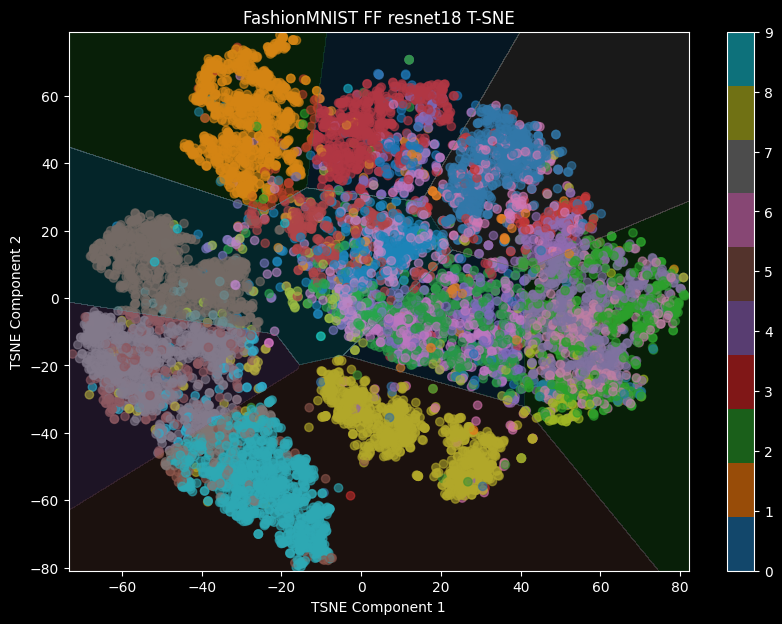

T-SNE plot for FashionMNIST FF resnet18 T-SNE dataset generated.
Processing resnet18 with method finetune_backbone using checkpoint outputs-before/resnet18_fmnist/finetune_backbone/retraincheckpoint.pth.tar...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Performing T-SNE on FashionMNIST finetune_backbone resnet18 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


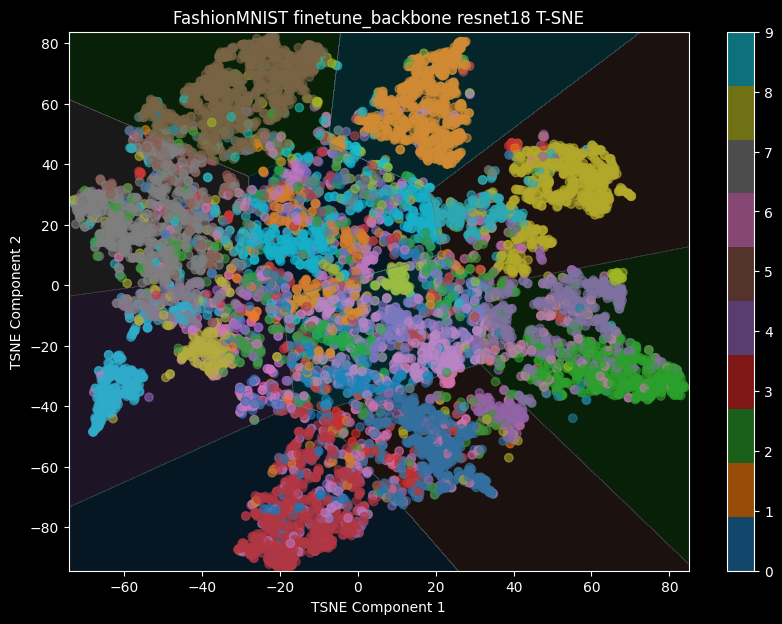

T-SNE plot for FashionMNIST finetune_backbone resnet18 T-SNE dataset generated.
Processing resnet18 with method FT using checkpoint outputs-before/resnet18_fmnist/FT/FTcheckpoint.pth.tar...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Performing T-SNE on FashionMNIST FT resnet18 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


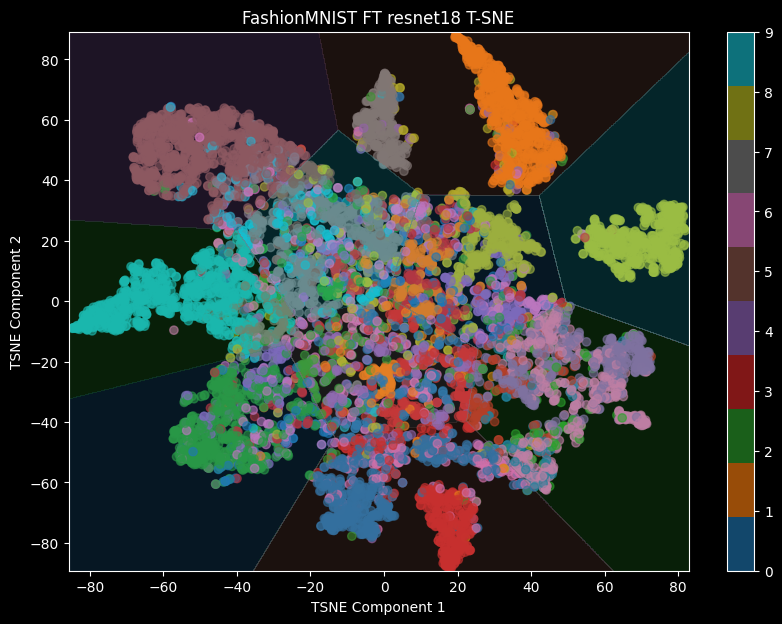

T-SNE plot for FashionMNIST FT resnet18 T-SNE dataset generated.
Processing resnet18 with method FT_prune using checkpoint outputs-before/resnet18_fmnist/FT_prune/FT_prunecheckpoint.pth.tar...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Performing T-SNE on FashionMNIST FT_prune resnet18 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


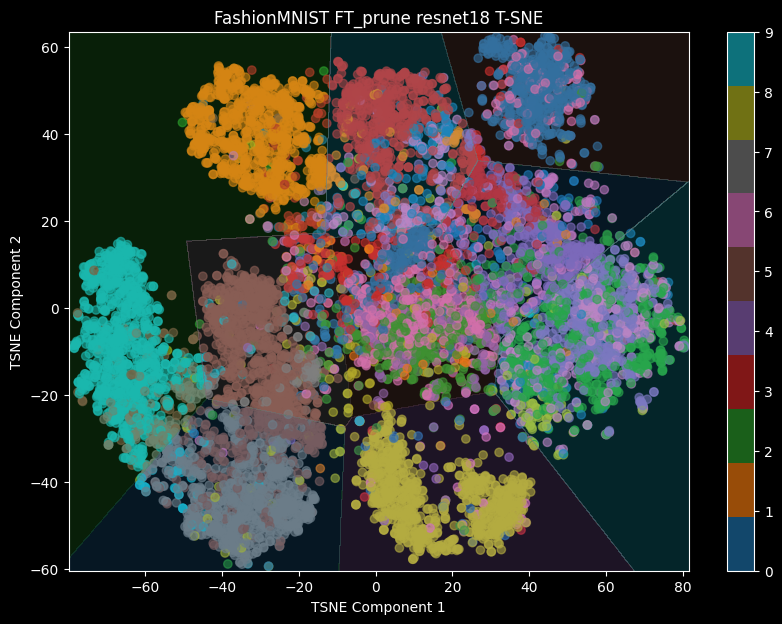

T-SNE plot for FashionMNIST FT_prune resnet18 T-SNE dataset generated.
Processing resnet18 with method GA using checkpoint outputs-before/resnet18_fmnist/GA/GAcheckpoint.pth.tar...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Performing T-SNE on FashionMNIST GA resnet18 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


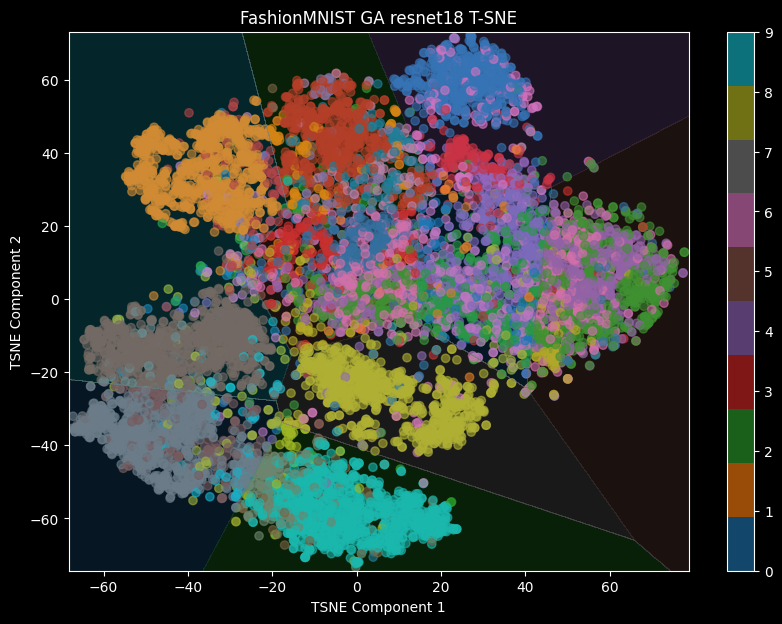

T-SNE plot for FashionMNIST GA resnet18 T-SNE dataset generated.
Processing resnet18 with method IU using checkpoint outputs-before/resnet18_fmnist/IU/wfishercheckpoint.pth.tar...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/utils/extm

Performing T-SNE on FashionMNIST IU resnet18 T-SNE dataset...
Failed to process resnet18 with method IU: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Processing resnet18 with method retrain using checkpoint outputs-before/resnet18_fmnist/retrain/retraincheckpoint.pth.tar...
Performing T-SNE on FashionMNIST retrain resnet18 T-SNE dataset...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


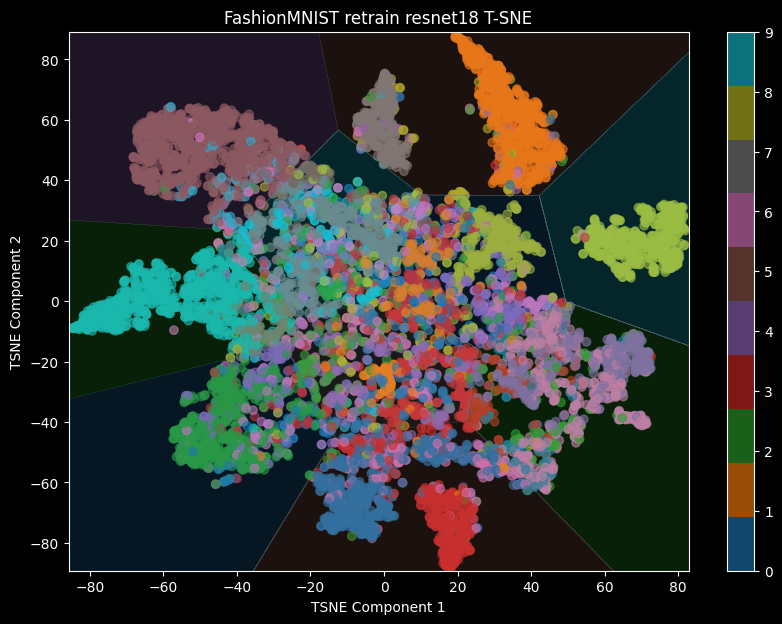

T-SNE plot for FashionMNIST retrain resnet18 T-SNE dataset generated.
Processing vgg16 with method FF using checkpoint outputs-before/vgg16_fmnist/FF/fishercheckpoint.pth.tar...


/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/suizhihao/.conda/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Failed to process vgg16 with method FF: Error(s) in loading state_dict for VGG:
	size mismatch for features.7.weight: copying a param with shape torch.Size([128, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for features.10.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 128, 3, 3]).
	size mismatch for features.10.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for features.14.weight: copying a param with shape torch.Size([256, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for features.17.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 256, 3, 3]).
	size mismatch for features.17.bias: copying a param with shape torch.Size([256]) from

In [20]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import cm

# 模型定义（ResNet18和VGG16示例）
from torchvision.models import resnet18, vgg16

# 读取本地FashionMNIST数据集
def load_fashion_mnist(path, batch_size=256):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # 将1通道复制成3通道
    ])
    dataset = FashionMNIST(root=path, train=False, download=False, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return dataloader

data_dir = '../data'
batch_size = 256
fashionmnist_loader = load_fashion_mnist(data_dir, batch_size)

# 定义模型加载函数
def load_model(model_type, checkpoint_path):
    if model_type == 'resnet18':
        model = resnet18(pretrained=False)
        num_ftrs = model.fc.in_features
        model.fc = nn.Identity()  # 去除最后的全连接层以获取特征
    elif model_type == 'vgg16':
        model = vgg16(pretrained=False)
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Identity()  # 去除最后的全连接层以获取特征
    else:
        raise ValueError("Unknown model type")
    
    checkpoint = torch.load(checkpoint_path)
    if 'state_dict' not in checkpoint:
        raise KeyError(f"'state_dict' not found in checkpoint: {checkpoint_path}")
    
    state_dict = checkpoint['state_dict']
    
    # 处理ResNet的输入通道数不匹配问题
    if model_type == 'resnet18' and 'conv1.weight' in state_dict:
        conv1_weight = state_dict['conv1.weight']
        if conv1_weight.shape[1] == 1:  # 如果权重是单通道的
            conv1_weight = conv1_weight.repeat(1, 3, 1, 1) / 3  # 重复权重到3通道并平均
            state_dict['conv1.weight'] = conv1_weight
    
    state_dict = {k: v for k, v in state_dict.items() if k in model.state_dict()}
    model.load_state_dict(state_dict, strict=False)
    model.eval()
    return model

# 提取特征函数
def extract_features(loader, model):
    features = []
    labels = []
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            features.append(output)
            labels.append(target)
    features = torch.cat(features).numpy()
    labels = torch.cat(labels).numpy()
    return features, labels

# T-SNE 可视化函数
def plot_tsne_with_clusters(data, labels, title, n_clusters=10):
    print(f"Performing T-SNE on {title} dataset...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    transformed_data = tsne.fit_transform(data).astype(np.float64)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(transformed_data)
    cluster_labels = kmeans.predict(transformed_data)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    
    # 绘制聚类边界
    x_min, x_max = transformed_data[:, 0].min() - 1, transformed_data[:, 0].max() + 1
    y_min, y_max = transformed_data[:, 1].min() - 1, transformed_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()].astype(np.float64))  # 转换为float64类型
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=cm.tab10)
    
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.show()
    print(f"T-SNE plot for {title} dataset generated.")

# 遍历目录获取所有checkpoint文件路径
def get_checkpoint_paths(base_path, model_types, unlearning_methods):
    paths = []
    for model_type in model_types:
        for method in unlearning_methods:
            method_dir = os.path.join(base_path, f'{model_type}_fmnist', method)
            if os.path.isdir(method_dir):
                for file in os.listdir(method_dir):
                    if file.endswith('.pth.tar') and 'checkpoint' in file:
                        paths.append((model_type, method, os.path.join(method_dir, file)))
    return paths

# 定义路径和模型类型
model_types = ['resnet18', 'vgg16']
unlearning_methods = ['FF', 'finetune_backbone', 'FT', 'FT_prune', 'GA', 'IU', 'retrain']
base_path = 'outputs-before'

# 获取所有checkpoint文件路径
checkpoint_paths = get_checkpoint_paths(base_path, model_types, unlearning_methods)

# 循环遍历所有模型和方法
for model_type, method, checkpoint_path in checkpoint_paths:
    try:
        print(f"Processing {model_type} with method {method} using checkpoint {checkpoint_path}...")
        model = load_model(model_type, checkpoint_path)
        features, labels = extract_features(fashionmnist_loader, model)
        scaler = StandardScaler()
        features = scaler.fit_transform(features)
        plot_tsne_with_clusters(features, labels, f'FashionMNIST {method} {model_type} T-SNE')
    except Exception as e:
        print(f"Failed to process {model_type} with method {method}: {e}")


In [23]:
# Data directories
BASE_DIR="/nvme/szh/data/3ai/lips"
CIFAR10_DIR="$BASE_DIR/data/cifar-10"
CIFAR100_DIR="$BASE_DIR/data/cifar-100"
FASHIONMNIST_DIR="$BASE_DIR/data/fashion-mnist"
TINYIMAGENET_DIR="$BASE_DIR/tiny-imagenet-200"

# Check if the data directories exist
if [ ! -d "$CIFAR10_DIR" ]; then
    echo "Cifar10 data directory not found: $CIFAR10_DIR"
    exit 1
fi

if [ ! -d "$CIFAR100_DIR" ]; then
    echo "Cifar100 data directory not found: $CIFAR100_DIR"
    exit 1
fi

if [ ! -d "$FASHIONMNIST_DIR" ]; then
    echo "FashionMNIST data directory not found: $FASHIONMNIST_DIR"
    exit 1
fi

if [ ! -d "$TINYIMAGENET_DIR" ]; then
    echo "TinyImagenet data directory not found: $TINYIMAGENET_DIR"
    exit 1
fi


SyntaxError: invalid syntax (947661807.py, line 9)